Total points for this HW: 100.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

Your answer here.

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

Your answer here.

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

Your answer here.

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [1]:
import pandas as pd
import numpy as np
from __future__ import print_function

In [2]:
try:
    from StringIO import StringIO
except:
    from io import StringIO
thefile = StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

### a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [3]:
# your code here
print('Good: {}, Bad: {}'.format(len(df[df.MPG == 'good']), len(df[df.MPG == 'bad'])))

Good: 5, Bad: 15


In [4]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

### b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [35]:
# your code here
def tree_split(column):
    for i in column:
        if i == column.max():
            right = df[column == column.max()]
            df8 = df[column == column.max()]
            dfN8 = df[column != column.max()]
        elif i == column.min():
            left = df[column == column.min()]
            df4 = df[column == column.min()]
            dfN4 = df[column != column.min()]
        else:
            df6 = df[~(column == column.max()) & ~(column == column.min())]

    print('Count of Good at split {}: {}, Count of Bad at split {}: {}, Information Gain: {}'.format\
          (column.min(), len(df4[df4.MPG == 'good']),column.min(), len(df4[df4.MPG == 'bad']), InformationGain(len(df4[df4.MPG == 'good']),
                len(df4[df4.MPG == 'bad']), len(dfN4[dfN4.MPG == 'good']), len(dfN4[dfN4.MPG == 'bad'])))),
    print('Count of Good at split {}: {}, Count of Bad at split {}: {}, Information Gain: {}'.format\
      (column[~(column == column.max()) & ~(column == column.min())].max(), len(df6[df6.MPG == 'good']), 
       column[~(column == column.max()) & ~(column == column.min())].max(), len(df6[df6.MPG == 'bad']),InformationGain(len(df6[df6.MPG == 'good']),
            len(df6[df6.MPG == 'bad']), (len(df[df.MPG == 'good']) - len(df6[df6.MPG == 'good'])), 
                                        (len(df[df.MPG == 'bad']) - len(df6[df6.MPG == 'bad']))))),
    print('Count of Good at split {}: {}, Count of Bad at split {}: {}, Information Gain: {}'.format\
          (column.max(), len(df8[df8.MPG == 'good']),column.max(), len(df8[df8.MPG == 'bad']),InformationGain(len(df8[df8.MPG == 'good']),
                len(df8[df8.MPG == 'bad']), len(dfN8[dfN8.MPG == 'good']), len(dfN8[dfN8.MPG == 'bad']))))
    
    return

In [36]:
tree_split(df.cylinders)

Count of Good at split 4: 5, Count of Bad at split 4: 4, Information Gain: 0.3652938975319328
Count of Good at split 6: 0, Count of Bad at split 6: 6, Information Gain: 0.15307795338969116
Count of Good at split 8: 0, Count of Bad at split 8: 5, Information Gain: 0.1225562489182657


In [37]:
tree_split(df.weight)

Count of Good at split light: 3, Count of Bad at split light: 3, Information Gain: 0.09710717945150363
Count of Good at split medium: 2, Count of Bad at split medium: 6, Information Gain: 0.0
Count of Good at split weighty: 0, Count of Bad at split weighty: 6, Information Gain: 0.15307795338969116


### c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [8]:
def continous_var(column):
    
    column_ = sorted(column.unique())
    
    mid_point = list()
    mid_point = [np.mean((column_[i], column_[i+1])) for i in range(len(column_) - 1)]
    
    for i in mid_point:
        goodY = len(df[(df.HP > i)][df.MPG == 'good'])
        goodN = len(df[(df.HP < i)][df.MPG == 'good'])
        badY = len(df[(df.HP > i)][df.MPG == 'bad'])
        badN = len(df[(df.HP < i)][df.MPG == 'bad'])
        
        
        print('For {} , GoodY: {}, GoodN: {}, BadY: {}, BadN: {}, Information Gain:{}'.format\
          (i,goodY, goodN, badY, badN,np.round(InformationGain(goodY,badY,goodN,badN),5)))
        
    return 

In [9]:
continous_var(df.HP)

For 70.0 , GoodY: 4, GoodN: 1, BadY: 15, BadN: 0, Information Gain:0.10591
For 78.0 , GoodY: 3, GoodN: 2, BadY: 15, BadN: 0, Information Gain:0.22626
For 83.0 , GoodY: 2, GoodN: 3, BadY: 15, BadN: 0, Information Gain:0.3671
For 87.0 , GoodY: 2, GoodN: 3, BadY: 14, BadN: 1, Information Gain:0.21417
For 89.5 , GoodY: 1, GoodN: 4, BadY: 14, BadN: 1, Information Gain:0.36578
For 91.0 , GoodY: 1, GoodN: 4, BadY: 13, BadN: 2, Information Gain:0.27593
For 92.5 , GoodY: 0, GoodN: 5, BadY: 13, BadN: 2, Information Gain:0.50919
For 93.5 , GoodY: 0, GoodN: 5, BadY: 12, BadN: 3, Information Gain:0.4295
For 94.5 , GoodY: 0, GoodN: 5, BadY: 11, BadN: 4, Information Gain:0.36529
For 97.5 , GoodY: 0, GoodN: 5, BadY: 8, BadN: 7, Information Gain:0.22336
For 105.0 , GoodY: 0, GoodN: 5, BadY: 6, BadN: 9, Information Gain:0.15308
For 124.5 , GoodY: 0, GoodN: 5, BadY: 5, BadN: 10, Information Gain:0.12256
For 142.0 , GoodY: 0, GoodN: 5, BadY: 4, BadN: 11, Information Gain:0.09445
For 157.5 , GoodY: 0, Good

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


### d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

Based on the results above, the most optimum split will be at HP <= 92.5 which gives the highest information gain and a good split between 'good' and 'bad' MPG. The two child nodes after this split have 7 and 13 samples respectively. The split with 7 samples have both good and bad MPG samples and therefore splitting it further would be desirable. 

### e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [41]:
# your code here
## Since we know 92.5 is a good split point, we'll start with that
tChild = df[df.HP <= 92.5][df.MPG =='bad']

## Now we'll look for next highest information Gain value in cylinder and weight  and we get it at cylinder = 4
goodT = tChild[tChild.cylinders == 4][tChild.MPG == 'good']
badT = tChild[tChild.cylinders == 4][tChild.MPG == 'bad']

print('Length after First split: {}, Length after second split for both child: {} & {}'.format\
      (len(tChild), len(goodT), len(badT)))

Length after First split: 2, Length after second split for both child: 0 & 0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


### f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

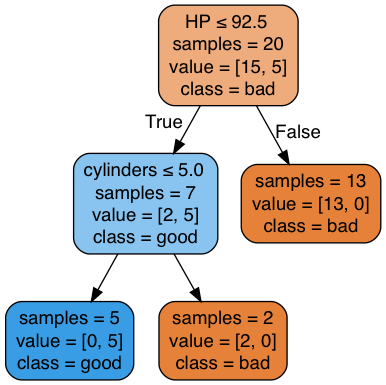

In [19]:
from sklearn import tree
from IPython.display import Image  
import pydotplus
from sklearn.tree import DecisionTreeClassifier

df_ = df.copy()
df_['weight'] = pd.factorize(df_['weight'].values)[0]
y = df_.loc[:,'MPG']
X = df_.loc[:,'cylinders':'weight']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)

dt = DecisionTreeClassifier(max_depth=4) # just to keep it simple for visualization
dt.fit(X,y)

thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X.columns.values, 
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)

graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png()) 

Fig 1. This figure gives the visual representation of the decision tree implemented in thi question.  

### g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

?,8,70,light
##### Bad  since the number of cylinder is greater than 5

?,6,113,medium
##### Bad since HP is greater than 92.5

?,4,83,weighty
##### Good since HP is less than 92.5 and cylinder is less than 5

?,4,95,weighty
##### Bad since HP is greater than 92.5


### Question 3, Predicting burden of disease （40 pts)

In [43]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head()

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high
3,Angola,0.2,0.63,14009,0.39604,0.69307,0.158420,0.55446,0.028,0.842,0.0670,22,1942,0.66139,0.53267,awful
4,Armenia,1.0,2.51,2780,0.79208,0.98020,0.603960,0.95050,0.060,0.202,0.1720,11,5697,0.97624,0.97030,low


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [44]:
data.columns

Index(['Country', 'FrxnPeaceIn10', 'ODA4H2OPcptaDol', 'RenewResm3PcptaYr',
       'SustAccImprWatRur', 'SustAccImprWatUrb', 'SustAccImprSanRur',
       'SustAccImprSanUrb', 'TotHlthExpPctofGDP', 'GenGovtPctofTotHlthExp',
       'ExtResHlthPctTotExpHlth', 'PCptaGovtExpHlthAvgExcRt', 'GDPPCptaIntDol',
       'AdultLtrcyRate', 'FemaleLtrcyRate', 'BurdenOfDisease'],
      dtype='object')

In [45]:
X=data.loc[:,"FrxnPeaceIn10":"FemaleLtrcyRate"]
X=pd.get_dummies(X)

y=data.loc[:,"BurdenOfDisease"]

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)

In [47]:
score = []
score_train= []
maxd= []
for i in range(1,10):
    clf =  DecisionTreeClassifier(max_depth=i, random_state=99).fit(X_train, y_train)
    score.append(clf.score(X_test, y_test))
    score_train.append(clf.score(X_train, y_train))
    maxd.append(i)
    print('Score for Training Set: {} for max_depth= {}'.format(clf.score(X_train, y_train), i))
    print('Score for Test Set: {} for max_depth= {} \n'.format(clf.score(X_test, y_test), i))

Score for Training Set: 0.4942528735632184 for max_depth= 1
Score for Test Set: 0.4883720930232558 for max_depth= 1 

Score for Training Set: 0.735632183908046 for max_depth= 2
Score for Test Set: 0.4883720930232558 for max_depth= 2 

Score for Training Set: 0.8505747126436781 for max_depth= 3
Score for Test Set: 0.627906976744186 for max_depth= 3 

Score for Training Set: 0.9195402298850575 for max_depth= 4
Score for Test Set: 0.5813953488372093 for max_depth= 4 

Score for Training Set: 0.9655172413793104 for max_depth= 5
Score for Test Set: 0.6046511627906976 for max_depth= 5 

Score for Training Set: 0.9885057471264368 for max_depth= 6
Score for Test Set: 0.627906976744186 for max_depth= 6 

Score for Training Set: 1.0 for max_depth= 7
Score for Test Set: 0.6046511627906976 for max_depth= 7 

Score for Training Set: 1.0 for max_depth= 8
Score for Test Set: 0.6046511627906976 for max_depth= 8 

Score for Training Set: 1.0 for max_depth= 9
Score for Test Set: 0.6046511627906976 for m

### b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

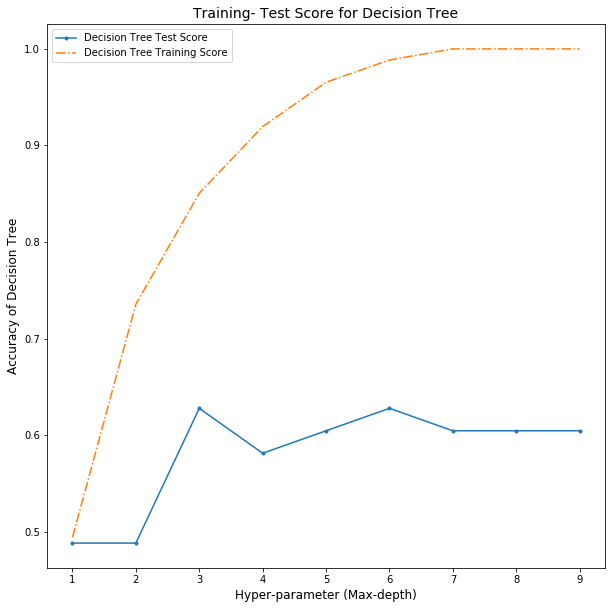

In [54]:
import matplotlib.pylab as plt

# your code here
plt.figure(figsize=[10,10])
plt.plot(maxd, score, '.-', label = 'Decision Tree Test Score')
plt.plot(maxd, score_train, '-.', label = 'Decision Tree Training Score')
plt.xlabel('Hyper-parameter (Max-depth)', fontsize = 12)
plt.ylabel('Accuracy of Decision Tree', fontsize = 12)
plt.title('Training- Test Score for Decision Tree', fontsize=14)
plt.legend(loc='best')
plt.show();

Fig 2: This figure gives the plot for variation in test and training score for every change in hyper-parameter(max_depth)

### c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [49]:
from sklearn.model_selection import GridSearchCV

# your code here 
from sklearn.model_selection import GridSearchCV
param_grid ={'max_depth':range(2,10)}
clf =  DecisionTreeClassifier(random_state=99)
gr=GridSearchCV(clf,param_grid=param_grid)
rs=gr.fit(X_test,y_test)
print (rs.best_params_)

{'max_depth': 3}


### d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [52]:
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=2) # just to keep it simple for visualization
dt.fit(X_train,y_train)

# display the output using www.webgraphviz.com, or if you have GraphViz installed on
# your computer, you can use that
print (tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\","))

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="GDPPCptaIntDol <= 2411.0, samples = 87, value = [19, 24, 24, 20], class = high", fillcolor="#47e53900"] ;
1 [label="GDPPCptaIntDol <= 975.0, samples = 36, value = [19, 16, 0, 1], class = awful", fillcolor="#e5813926"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 11, value = [11, 0, 0, 0], class = awful", fillcolor="#e58139ff"] ;
1 -> 2 ;
3 [label="samples = 25, value = [8, 16, 0, 1], class = high", fillcolor="#47e53978"] ;
1 -> 3 ;
4 [label="SustAccImprSanRur <= 0.624, samples = 51, value = [0, 8, 24, 19], class = low", fillcolor="#399de528"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 28, value = [0, 7, 4, 17], class = medium", fillcolor="#d739e579"] ;
4 -> 5 ;
6 [label="samples = 23, value = [0, 1, 20, 2], class = low", fillcolor="#399de5db"] ;
4 -> 6 ;
}


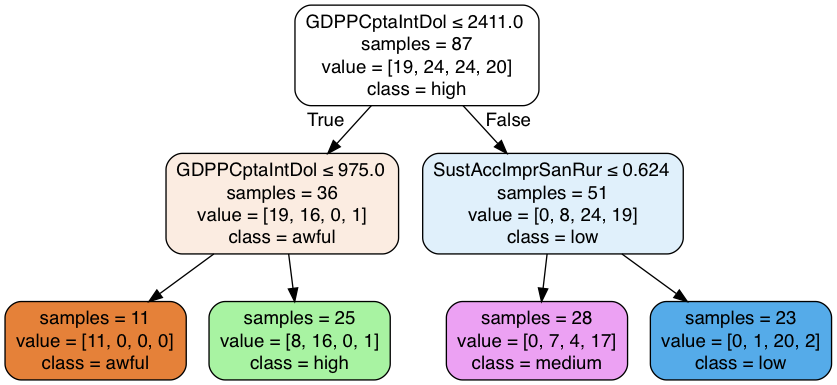

In [53]:
from sklearn import tree
from IPython.display import Image  
import pydotplus
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png()) 

Fig 3: THe figure gives the visual representation of the classification decision tree for the problem addressed in the question.

### Question 4, Fit a random forest to the data from question 3 (20 pts)

#### a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [363]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# your code here
X=data.loc[:,"FrxnPeaceIn10":"FemaleLtrcyRate"]
X=pd.get_dummies(X)

y=data.loc[:,"BurdenOfDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=99)

scoreF = []
maxd= []
for i in range(1,10):
    clf =  RandomForestClassifier(n_estimators=20, n_jobs=-1,max_depth=i).fit(X_train, y_train)
    scoreF.append(clf.score(X_test, y_test))
    maxd.append(i)
    print('Score for Training Set: {} for max_depth= {}'.format(clf.score(X_train, y_train), i))
    print('Score for Test Set: {} for max_depth= {} \n'.format(clf.score(X_test, y_test), i))

Score for Training Set: 0.735632183908 for max_depth= 1
Score for Test Set: 0.581395348837 for max_depth= 1 

Score for Training Set: 0.862068965517 for max_depth= 2
Score for Test Set: 0.697674418605 for max_depth= 2 

Score for Training Set: 0.896551724138 for max_depth= 3
Score for Test Set: 0.627906976744 for max_depth= 3 

Score for Training Set: 0.919540229885 for max_depth= 4
Score for Test Set: 0.627906976744 for max_depth= 4 

Score for Training Set: 0.977011494253 for max_depth= 5
Score for Test Set: 0.558139534884 for max_depth= 5 

Score for Training Set: 1.0 for max_depth= 6
Score for Test Set: 0.767441860465 for max_depth= 6 

Score for Training Set: 0.988505747126 for max_depth= 7
Score for Test Set: 0.674418604651 for max_depth= 7 

Score for Training Set: 0.988505747126 for max_depth= 8
Score for Test Set: 0.697674418605 for max_depth= 8 

Score for Training Set: 1.0 for max_depth= 9
Score for Test Set: 0.697674418605 for max_depth= 9 



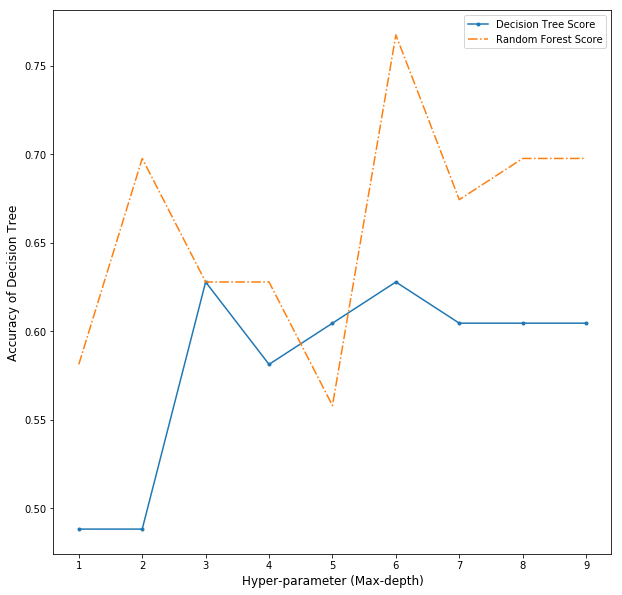

In [376]:
plt.figure(figsize=[10,10])
plt.plot(maxd, score, '.-', label = 'Decision Tree Score')
plt.plot(maxd, scoreF, '-.', label = 'Random Forest Score')
plt.xlabel('Hyper-parameter (Max-depth)', fontsize = 12)
plt.ylabel('Accuracy of Decision Tree', fontsize = 12)
plt.legend(fontsize=10)
plt.show();

Fig 4: This plot gives the comparison between a single decision tree and random forest for classification with same data and similar parameters.

b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

Your answer here.